In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings('ignore')

# 데이터 명세서

**Main Theme : 신규 구매 전반 분석 및 결과 도식화** <br><br>

- 분석 자료 : 최근 3개월간 신규 구매 데이터 일부

- 분석 필요 내용

1. 구매 소요 시간 분석<br>
     1-1. 가입일로부터 구매일까지 전환된 소요시간 분석
         ㄴ 최근 3개월 전체 분석 / 각 월 별 분석
         ㄴ 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석
            ex. 가입 1일 이내 전환 유저 : 10% -> 15% 상승 성과
2. 구매 상품 트렌드 분석<br>
     2-1. 유저당 주문 수량 분석
         ㄴ 최근 3개월 전체 분석 / 각 월 별 분석
         ㄴ 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석
     2-2. 주문 아이템 분석<br>
         ㄴ 브랜드 별 선호도, 아이템 카테고리별 선호도 분석
         ㄴ 신규 유저들의 구매 트렌드 파악<br><br>
3. 분석 내용 토대로 인사이트 도출<br>
     3-1. 분석 내용 도식화
         ㄴ 1~2의 분석 내용 종합 및 도식화 (표 또는 그래프)
         ㄴ 유사성을 갖는 결과에 대하여 그룹화
     3-2. 인사이트 도출
         ㄴ 해당 결과를 통해 나타나는 사항 정리
         ㄴ 인사이트 도출 혹은 새로운 제안사항 전달 (없을 시 진행하지 않아도 무방)

- 분석 참고 사항

  1. 용어 및 칼럼 설명<br>
     brandnm : 아이템 브랜드명<br>
     goodsnm : 아이템 명<br>
     USER : 개별 유저 식별 값<br>
     reg_date : 개별 유저 가입일<br>
     order_date : 아이템 주문일<br>
     p_type : 주문 상품 종류<br>
             7days (7일권) / 4days (4일권)
     sub_type : 주문 상품 카테고리<br> 
               BA – 가방 / O – 아우터 / D – 드레스 / T – 상의 / B – 하의 / TB – 투피스 
     app_yn : 어플리케이션 사용 여부<br>
              Y – 어플리케이션 사용 / (공백) – 어플리케이션 미사용



# Data Load

In [221]:
df = pd.read_excel('./기술과제 제출/클로젯셰어_과제DB 대체 자료.xlsx')
print(df.shape)
df.head()

(1471, 8)


,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y


# Data info & description

In [222]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   brandnm     1442 non-null   object        
 1   goodsnm     1471 non-null   object        
 2   USER        1471 non-null   object        
 3   reg_date    1466 non-null   datetime64[ns]
 4   order_date  1471 non-null   datetime64[ns]
 5   p_type      1471 non-null   object        
 6   sub_type    1471 non-null   object        
 7   app_yn      1295 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 92.1+ KB


None

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
count,1442,1471,1471,1466,1471,1471,1471,1295
unique,245,979,1234,368,90,2,6,1
top,Gucci,chevron quilted cross bag black,a1149461,2021-03-16 00:00:00,2021-03-24 00:00:00,4days,BA,Y
freq,232,23,11,44,47,894,692,1295
first,NaN,NaN,NaN,2017-06-24 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


* 날짜 타입 외에 모두 범주형 변수(object)
* 머신러닝 모델링을 할 것이 아니기 때문에 범주형 변수들 label encoding or one-hot encoding 할 필요없을까

In [223]:
df.isnull().sum()

brandnm        29
goodsnm         0
USER            0
reg_date        5
order_date      0
p_type          0
sub_type        0
app_yn        176
dtype: int64

* brandnm(브랜드명): unique값 245개(결측치: 29개) 
* goodsnm(아이템명): unique값 979개(결측치: 0) 
* USER(개별유저값): unique값 1234개(결측치: 0) 
* reg_date(가입일): unique값 368개(결측치: 0) 
* order_date(주문일): unique값 90개(결측치: 0) 
* p_type(주문상품 종류): unique값 2개(결측치: 0) 
    *              7days (7일권) / 4days (4일권)
* sub_type(주문상품 카테고리): unique값 6개(결측치: 0) 
    * BA – 가방 / O – 아우터 / D – 드레스 / T – 상의 / B – 하의 / TP – 투피스 
* app_yn(앱 이용여부): unique값 1개(결측치: 176개)(결측치는 어플리케이션 미사용) 

In [224]:
print(len(df.loc[df['brandnm'].isnull()]))
df.loc[df['brandnm'].isnull()].head(5)

29


,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
146,NaN,feminine military blouse & high waist wide slacks,a1144948,2021-01-30,2021-01-30,4days,TP,Y
147,NaN,button basic pattern doublebreasted-jacket sky...,a170041,2020-01-01,2021-01-30,4days,TP,Y
160,NaN,lace point shirring blouse pink & lace detail ...,a1141009,2021-01-04,2021-01-28,4days,TP,Y
220,NaN,printing pattern hoodie grey & pocket basic pa...,a1144470,2021-01-25,2021-01-26,4days,TP,Y
267,NaN,button basic pattern jacket black & pocket bas...,a121913,2019-05-05,2021-01-21,4days,TP,Y


* brandnm(브랜드명)에는 결측치가 29개가 있음
* 결측치 각 데이터를 봤을 때 상품명과 구매한 유저, 주문상품종류, 상품카테고리 등의 정보는 다 존재함
--> drop 하지 않고 분석 진행

# preprocessing

In [225]:
# app_yn에서 Y는 1로 결측치는 0으로 전처리
df['app_yn'] = df['app_yn'].replace('Y', 1).replace(np.nan, 0)
df['app_yn'] = df['app_yn'].astype('int')
print(df['app_yn'].isnull().any())
display(df['app_yn'].value_counts())

False


1    1295
0     176
Name: app_yn, dtype: int64

In [227]:
# 주문일의 요일 컬럼 추가
df['order_weekday'] = df['order_date'].dt.day_name()

In [228]:
# USER 컬럼 --> 소문자로
df.rename(columns={'USER':'user'}, inplace=True)

In [229]:
# 상품 카테고리 한글로
def rename_cate(row):
    if pd.isnull(row):
        return np.nan
    else:
        return row.replace('BA', '가방').replace('O', '아우터').replace('D', '드레스').replace('TP','투피스').replace('T', '상의').\
    replace('B', '하의')    
    
df['sub_type2'] = df['sub_type'].apply(rename_cate)

# 1st EDA

In [230]:
df.head(3)

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,order_weekday,sub_type2
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,1,Friday,가방
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,0,Friday,아우터
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,0,Friday,하의


In [231]:
print(f"가입일: {df['reg_date'].min()}~{df['reg_date'].max()}")
print(f"주문일: {df['order_date'].min()}~{df['order_date'].max()}")

가입일: 2017-06-24 00:00:00~2021-03-31 00:00:00
주문일: 2021-01-01 00:00:00~2021-03-31 00:00:00


* 가입일은 2017-06-24 ~ 2021-03-31
* 주문일은 2021-01-01 ~ 2021-03-31

In [232]:
df['p_type'].value_counts()

4days    894
7days    577
Name: p_type, dtype: int64

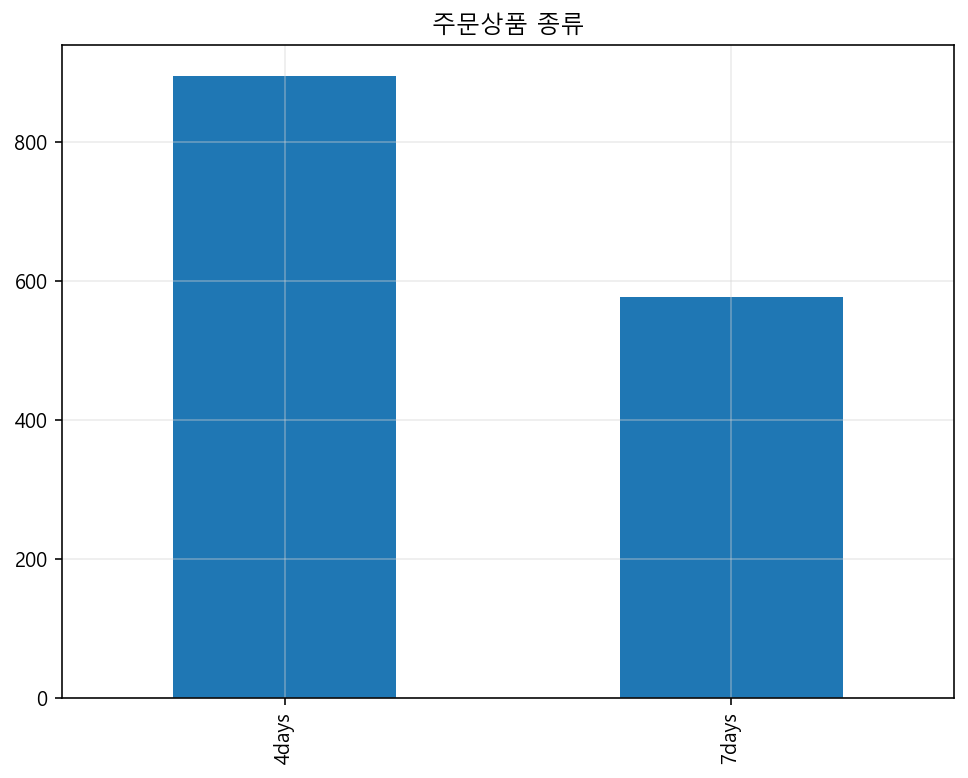

In [233]:
df['p_type'].value_counts().plot(kind='bar', figsize=(8, 6), title='주문상품 종류')
plt.grid(color='lightgrey', alpha=0.43)

* 클로젯셰어에서는 <1회권(4일), 1회권(7일), 중고판매>로 주문 구분이 나눠져있다.
* 제공받은 데이터에는 1회권(4일), 1회권(7일)만 있다.
* 1회권(4일)이 제일 많음

In [236]:
display(df['sub_type'].value_counts())
display(df['sub_type2'].value_counts())

BA    692
O     267
D     261
T     164
B      58
TP     29
Name: sub_type, dtype: int64

가방     692
아우터    267
드레스    261
상의     164
하의      58
투피스     29
Name: sub_type2, dtype: int64

* BA – 가방 / O – 아우터 / D – 드레스 / T – 상의 / B – 하의 / TP– 투피스 
* **가방, 아우터, 드레스, 상의, 하의, 투피스** 순으로 주문이 많다.

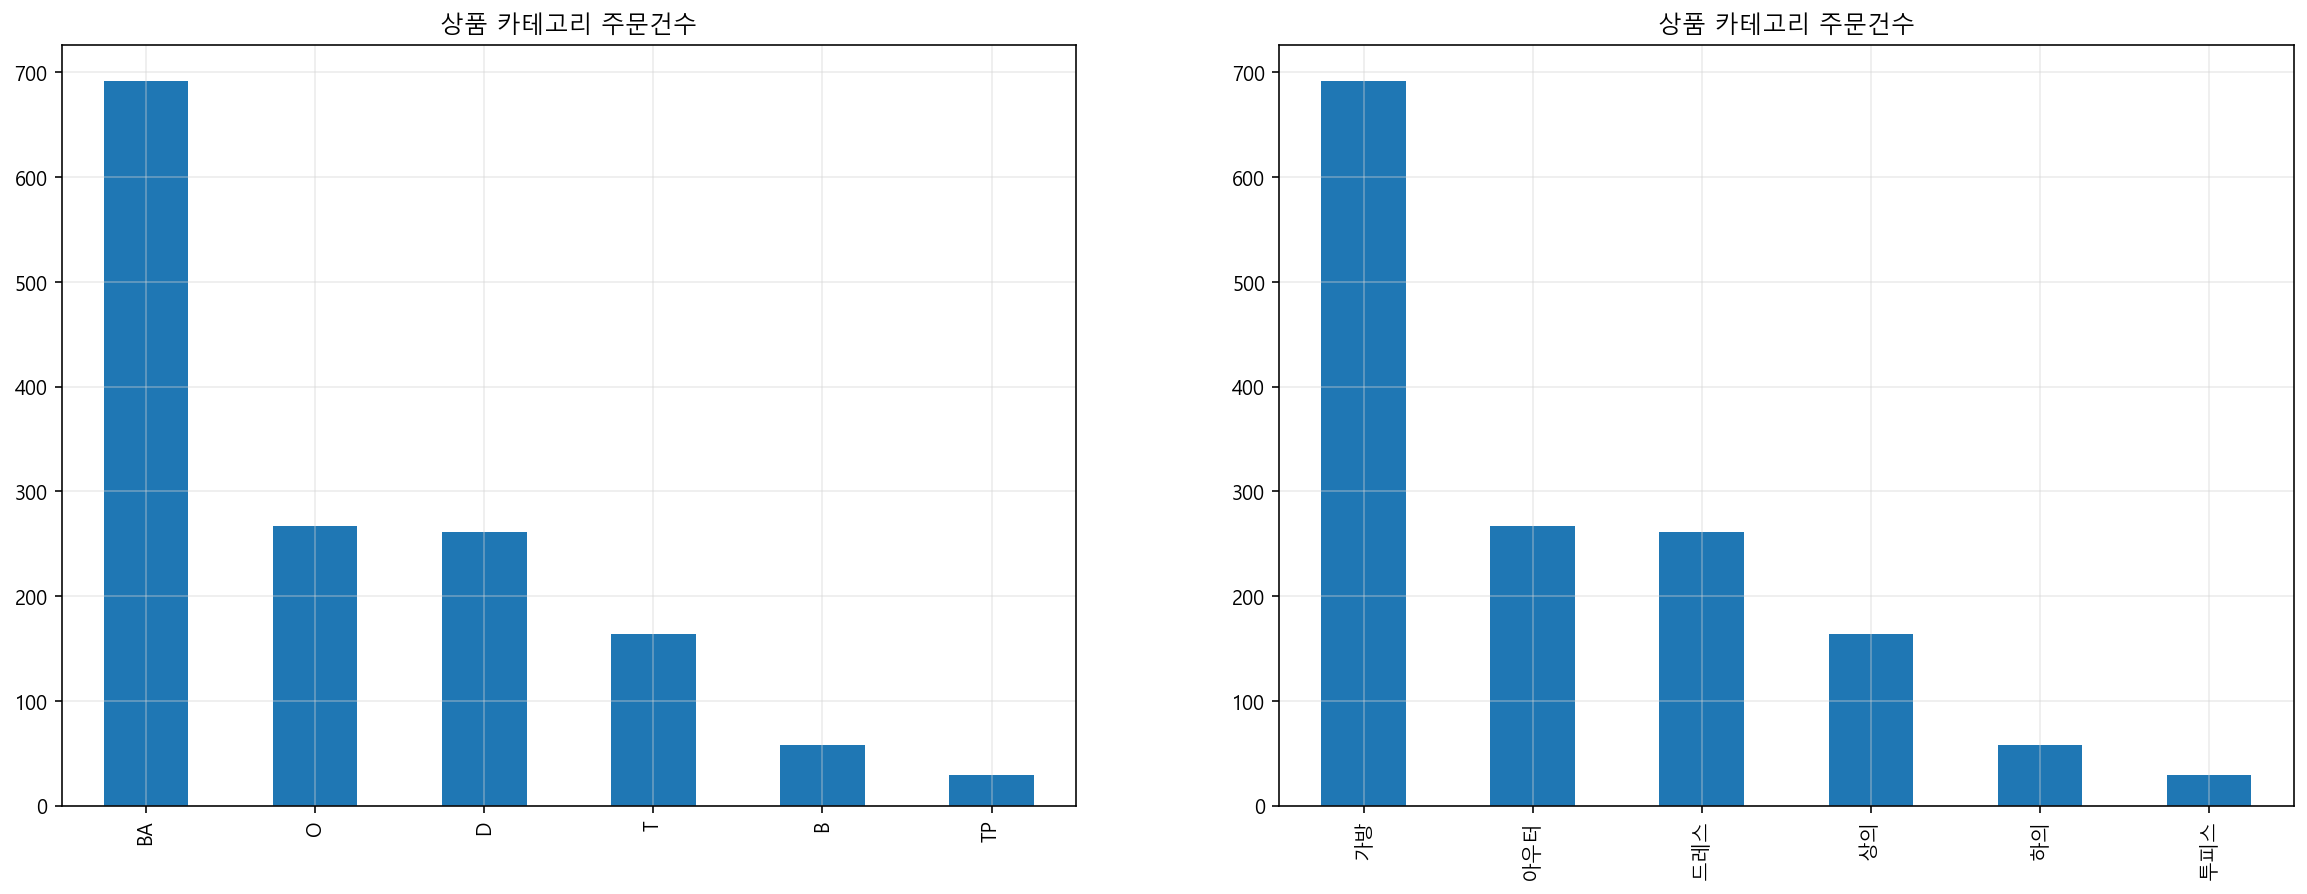

In [241]:
f, (ax1, ax2) = plt.subplots(1, 2)
df['sub_type'].value_counts().plot(kind='bar', figsize=(8, 6), title='상품 카테고리 주문건수', ax=ax1)
df['sub_type2'].value_counts().plot(kind='bar', figsize=(8, 6), title='상품 카테고리 주문건수', ax=ax2)
f.set_size_inches(20,7) 
ax1.grid(color='lightgrey', alpha=0.43)
ax2.grid(color='lightgrey', alpha=0.43)

In [242]:
df['app_yn'].value_counts().reset_index()

,index,app_yn
0,1,1295
1,0,176


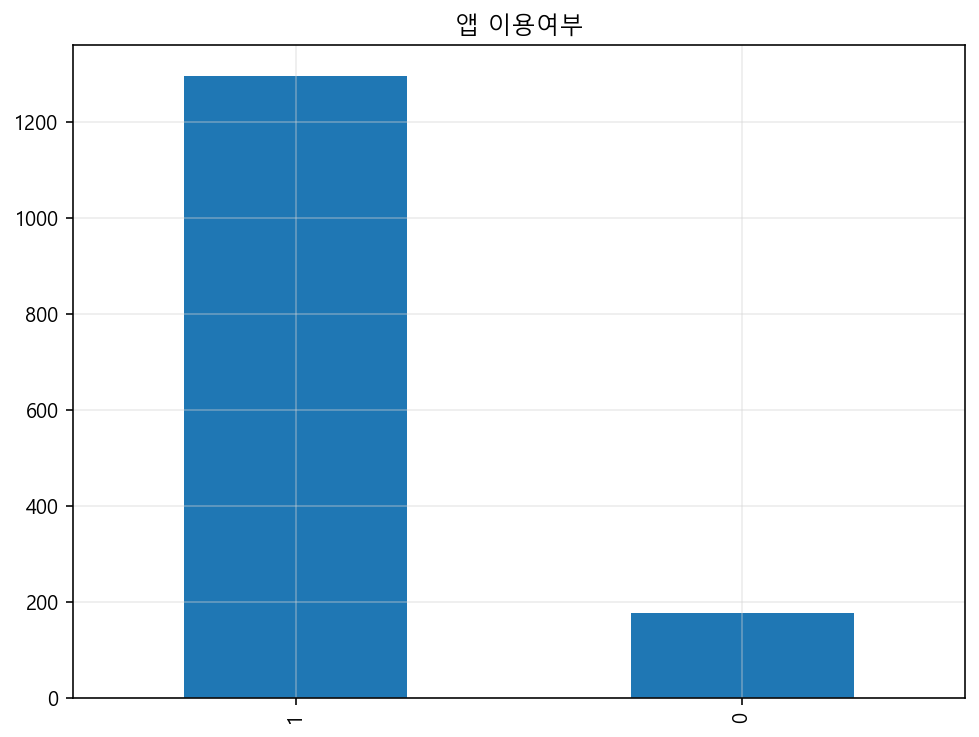

In [243]:
df['app_yn'].value_counts().plot(kind='bar', figsize=(8, 6), title='앱 이용여부')
plt.grid(color='lightgrey', alpha=0.43)

In [244]:
df.head()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,order_weekday,sub_type2
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,1,Friday,가방
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,0,Friday,아우터
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,0,Friday,하의
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,0,Friday,상의
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,1,Friday,아우터


<AxesSubplot:xlabel='user', ylabel='brandnm'>

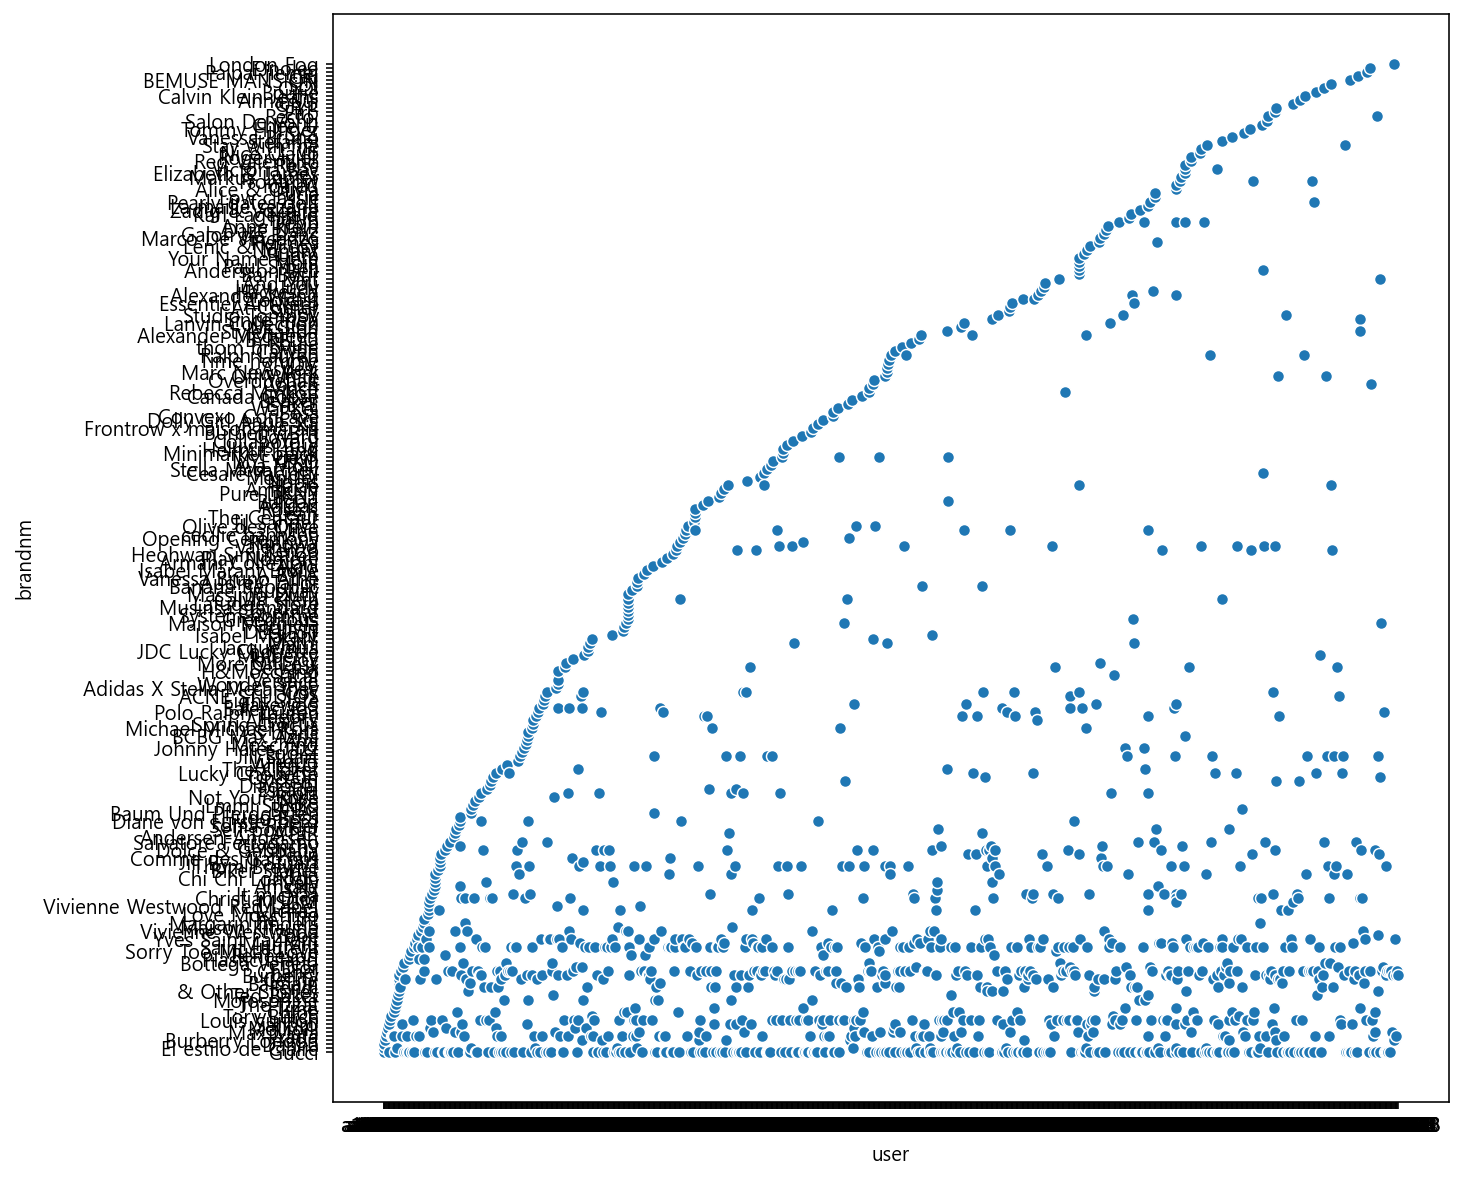

In [245]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='user', y='brandnm')

# 분석

## 구매 상품 트렌드 분석<br>
     2-1. 유저당 주문 수량 분석
         ㄴ 최근 3개월 전체 분석 / 각 월별 분석
         ㄴ 월별 변동사항 확인 -> 트렌드 분석
     2-2. 주문 아이템 분석
         ㄴ 브랜드별 선호도, 아이템 카테고리별 선호도 분석
         ㄴ 신규 유저들의 구매 트렌드 파악

### 유저당 주문수량 분석

In [125]:
df.head()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,order_weekday,sub_type2
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,Friday,가방
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,Friday,아우터
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,Friday,하의
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,Friday,상의
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,Friday,아우터


In [126]:
# 유저당 주문 수량분석
df['user'].value_counts().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

총주문건수: 1471
전체 기간 중 1회만 주문한 유저수: 1095
전체 기간 중 1회만 주문한 유저 비중: 74.44


Text(0.5, 1.0, '유저별 총주문건수')

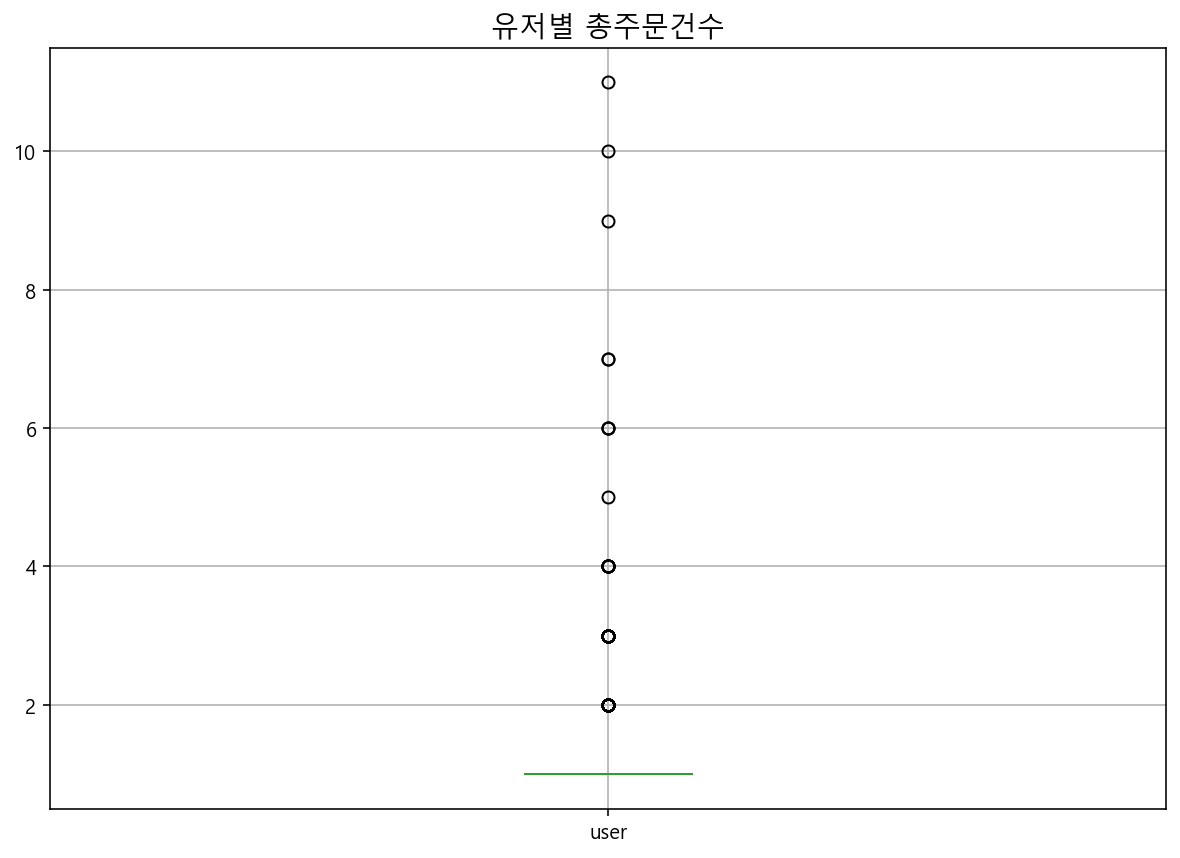

In [282]:
order_total = df['user'].value_counts().sum()
order_one = len(df['user'].value_counts().reset_index().query("user == 1"))
print(f"총주문건수: {order_total}")
print(f"전체 기간 중 1회만 주문한 유저수: {order_one}")
print(f"전체 기간 중 1회만 주문한 유저 비중: {round(order_one/order_total*100, 2)}")
df['user'].value_counts().reset_index().boxplot(figsize=(10, 7))
plt.title('유저별 총주문건수', fontsize=14)

* 전체 기간 중 오직 1번만 주문한 고객은 74.44%

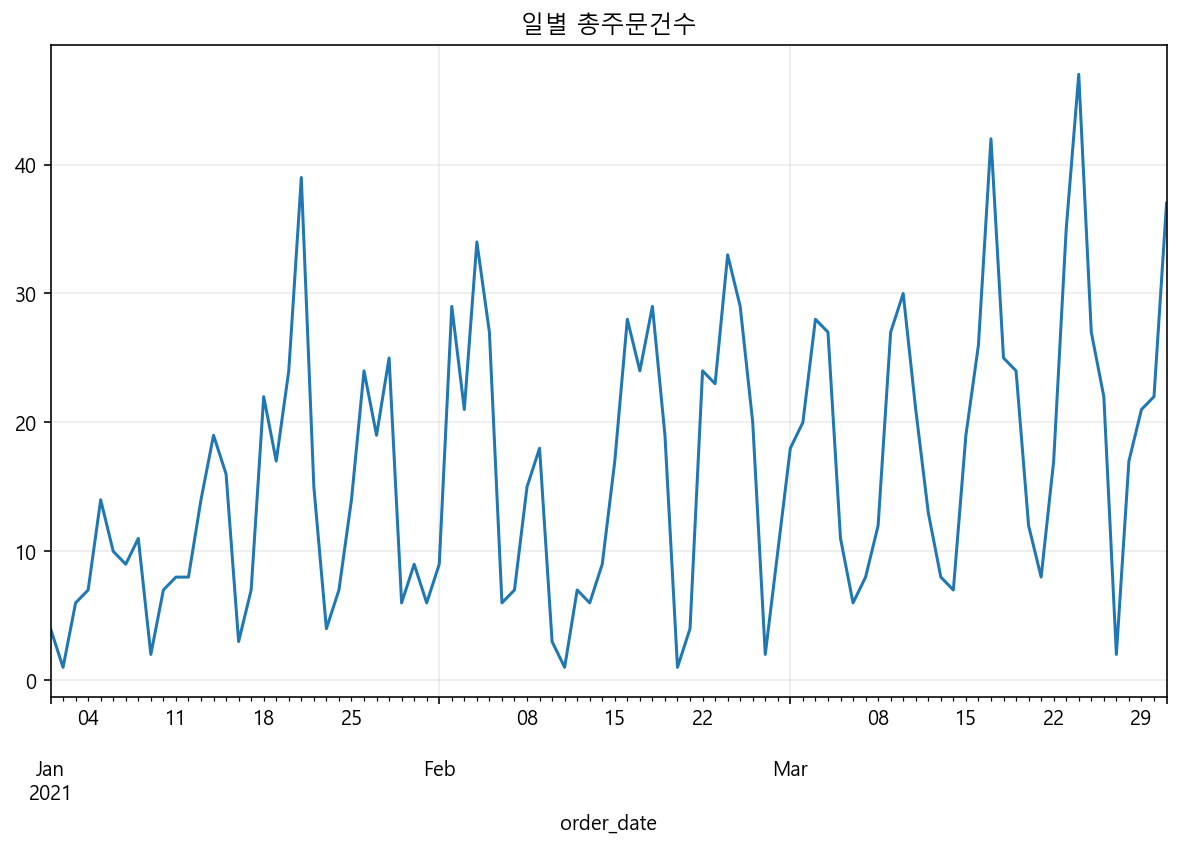

In [258]:
df.groupby(['order_date'])['user'].count().plot(kind='line', figsize=(10, 6), title='일별 총주문건수')
plt.grid(color='lightgrey', alpha=0.45)

* 일별 총주문건수에서 일정한 주기성을 보임
* 증가하다가 큰 폭으로 하락하는 주기성 → 급락하는 지점들은 대부분 일별 총주문건수가 10건 미만까지 떨어짐

* 일별 주문수량이 10건 미만인 날들을 보자

In [518]:
df.groupby(['order_date', 'order_weekday'])['user'].count().loc[df.groupby(['order_date', 'order_weekday'])['user'].count() < 10].reset_index()

,order_date,order_weekday,user
0,2021-01-01,Friday,4
1,2021-01-02,Saturday,1
2,2021-01-03,Sunday,6
3,2021-01-04,Monday,7
4,2021-01-07,Thursday,9
5,2021-01-09,Saturday,2
6,2021-01-10,Sunday,7
7,2021-01-11,Monday,8
8,2021-01-12,Tuesday,8
9,2021-01-16,Saturday,3


In [507]:
df_order_weekday_user = df.groupby(['order_date', 'order_weekday'])['user'].count().reset_index().query("user < 10")
df_order_weekday_user['order_weekday'].value_counts().reset_index().style.background_gradient('Blues')

,index,order_weekday
0,Saturday,12
1,Sunday,11
2,Friday,3
3,Monday,3
4,Thursday,2
5,Tuesday,1
6,Wednesday,1


* 일별 주문 수량이 10건 미만인 날은 주로 토요일, 일요일 <주말>에 몰려있음
* **즉, <일별 총주문건수>는 주말이 되면 주문건수가 급락하는 주기성 있음**

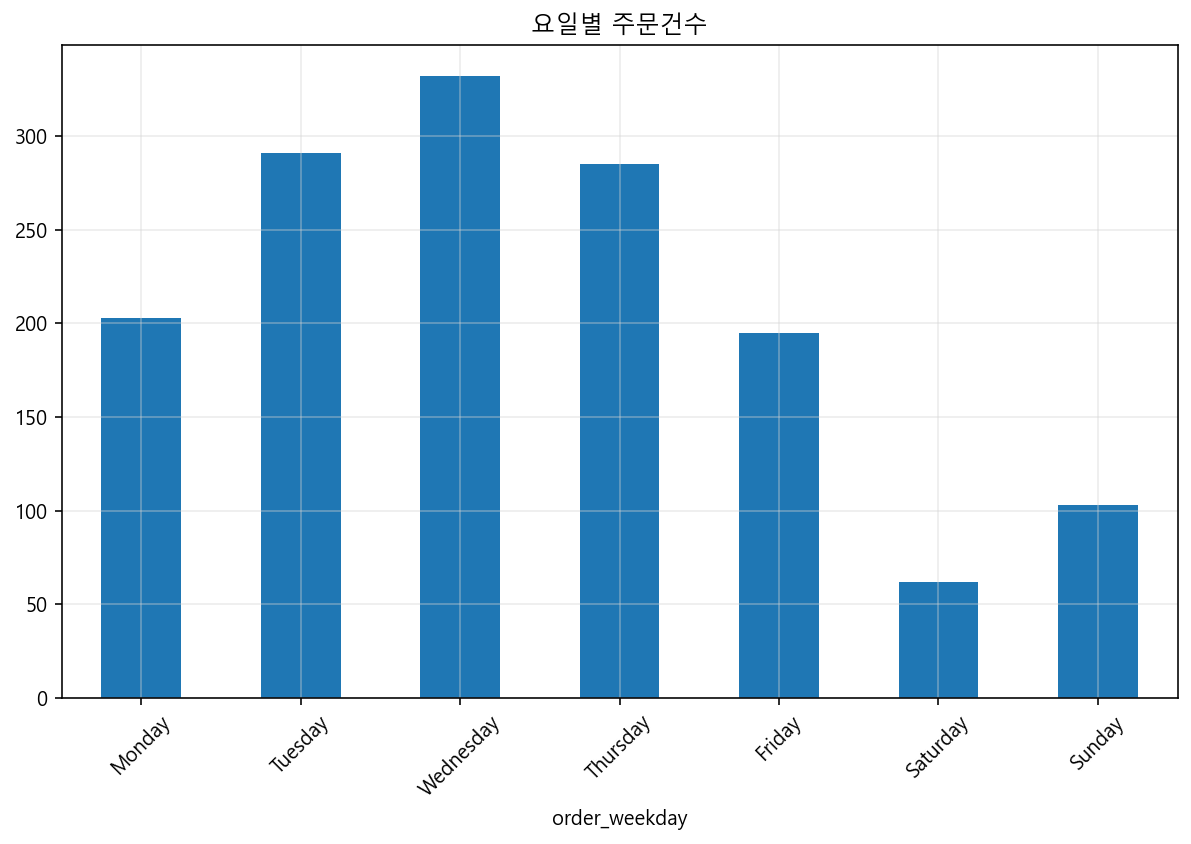

In [257]:
df.groupby(['order_weekday'])['user'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).\
                                                plot(kind='bar', figsize=(10, 6), rot=45, title='요일별 주문건수')
plt.grid(color='lightgrey', alpha=0.44)

* 요일별 주문건수에서는 '월 → 수'로 갈수록 주문건수가 증가하다가 수요일에 정점을 찍고
* 토요일까지 꾸준히 하락하다가 일요일에 살짝 반등 (토요일이 최저점)
* **주말이 평일보다 주문건수가 적음**

In [284]:
# 월별 분석위해 주문일 month 컬럼 생성
df['order_month'] = df['order_date'].dt.month
df.head(2)

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,order_weekday,sub_type2,order_month
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,1,Friday,가방,1
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,0,Friday,아우터,1


,order_month,user
0,1,377
1,2,455
2,3,639


,order_month,user
0,1,311
1,2,385
2,3,538


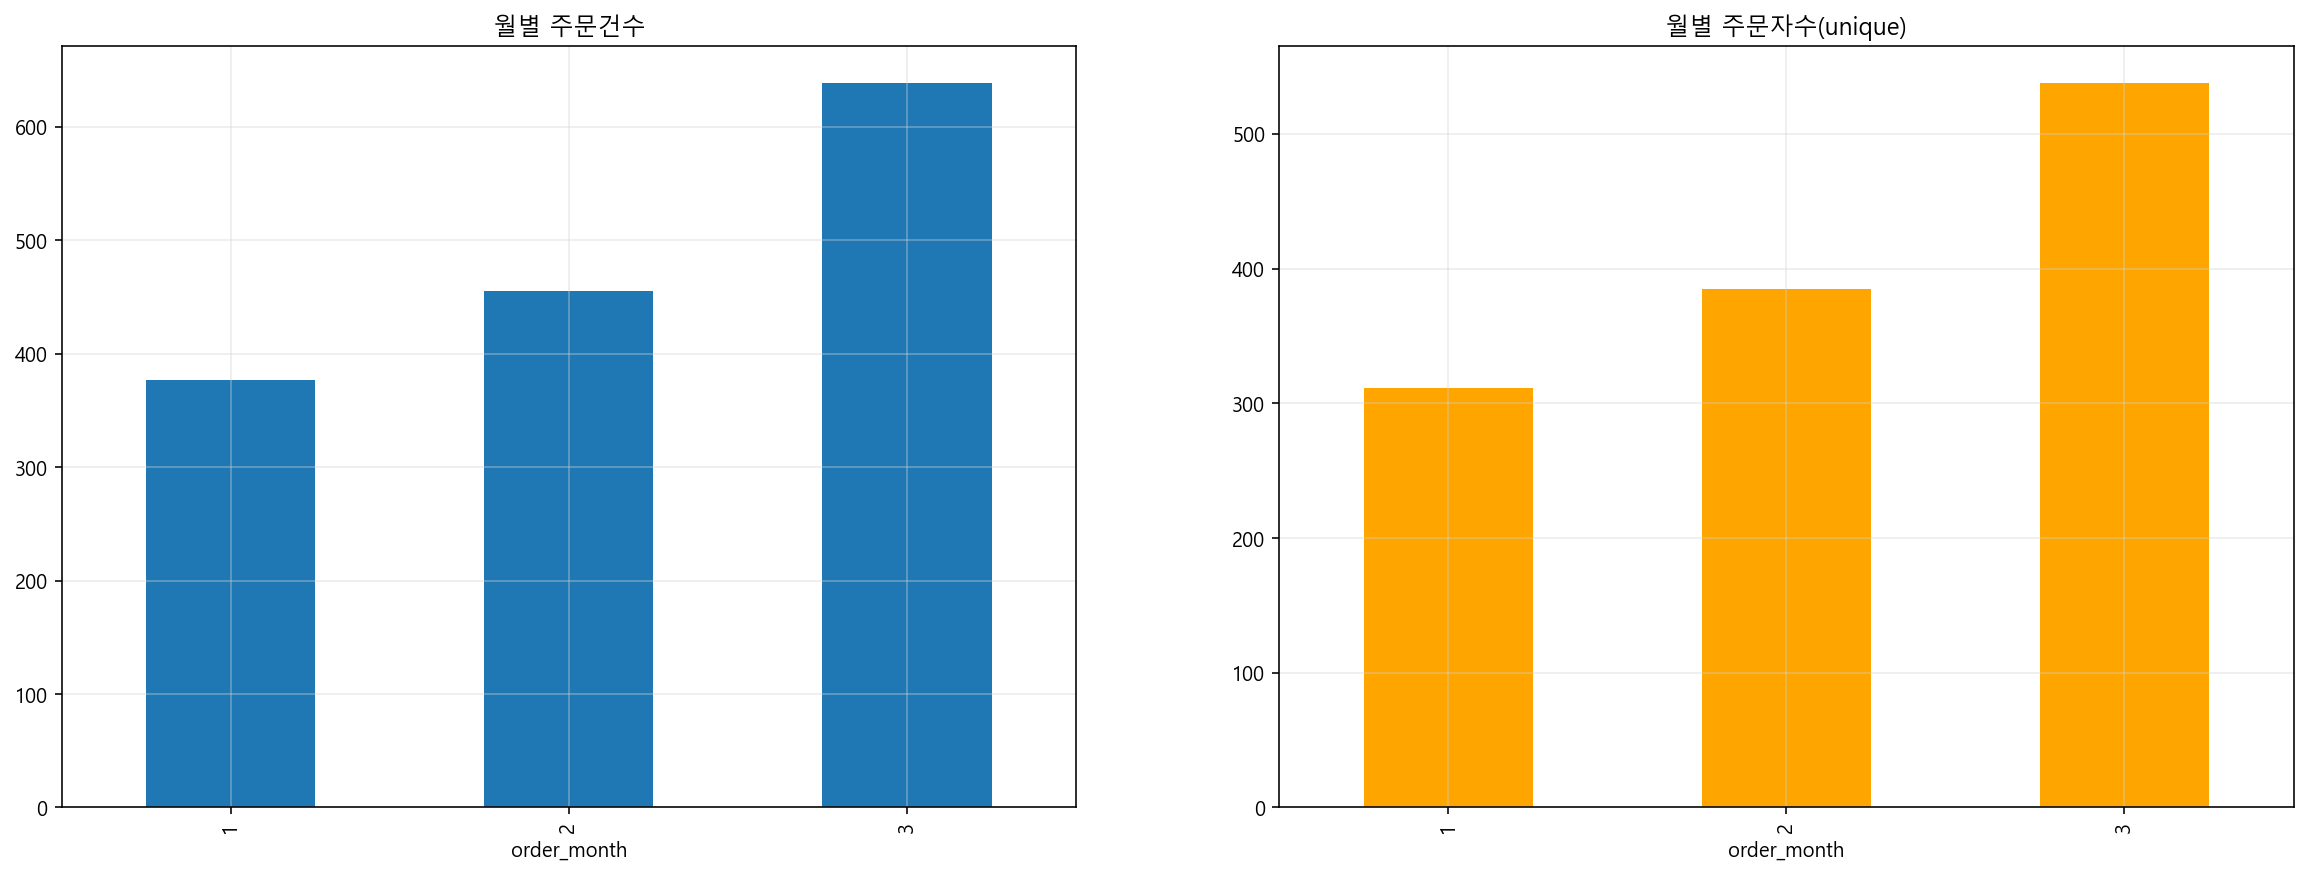

In [285]:
display(df.groupby(['order_month'])['user'].count().reset_index())
display(df.groupby(['order_month'])['user'].nunique().reset_index())
f, (ax1, ax2) = plt.subplots(1, 2)
df.groupby(['order_month'])['user'].count().plot(kind='bar', figsize=(9, 6), title='월별 주문건수', ax=ax1)
df.groupby(['order_month'])['user'].nunique().plot(kind='bar', figsize=(9, 6), title='월별 주문자수(unique)', color='orange', ax=ax2)
f.set_size_inches(20,7) 
ax1.grid(color='lightgrey', alpha=0.43)
ax2.grid(color='lightgrey', alpha=0.43)

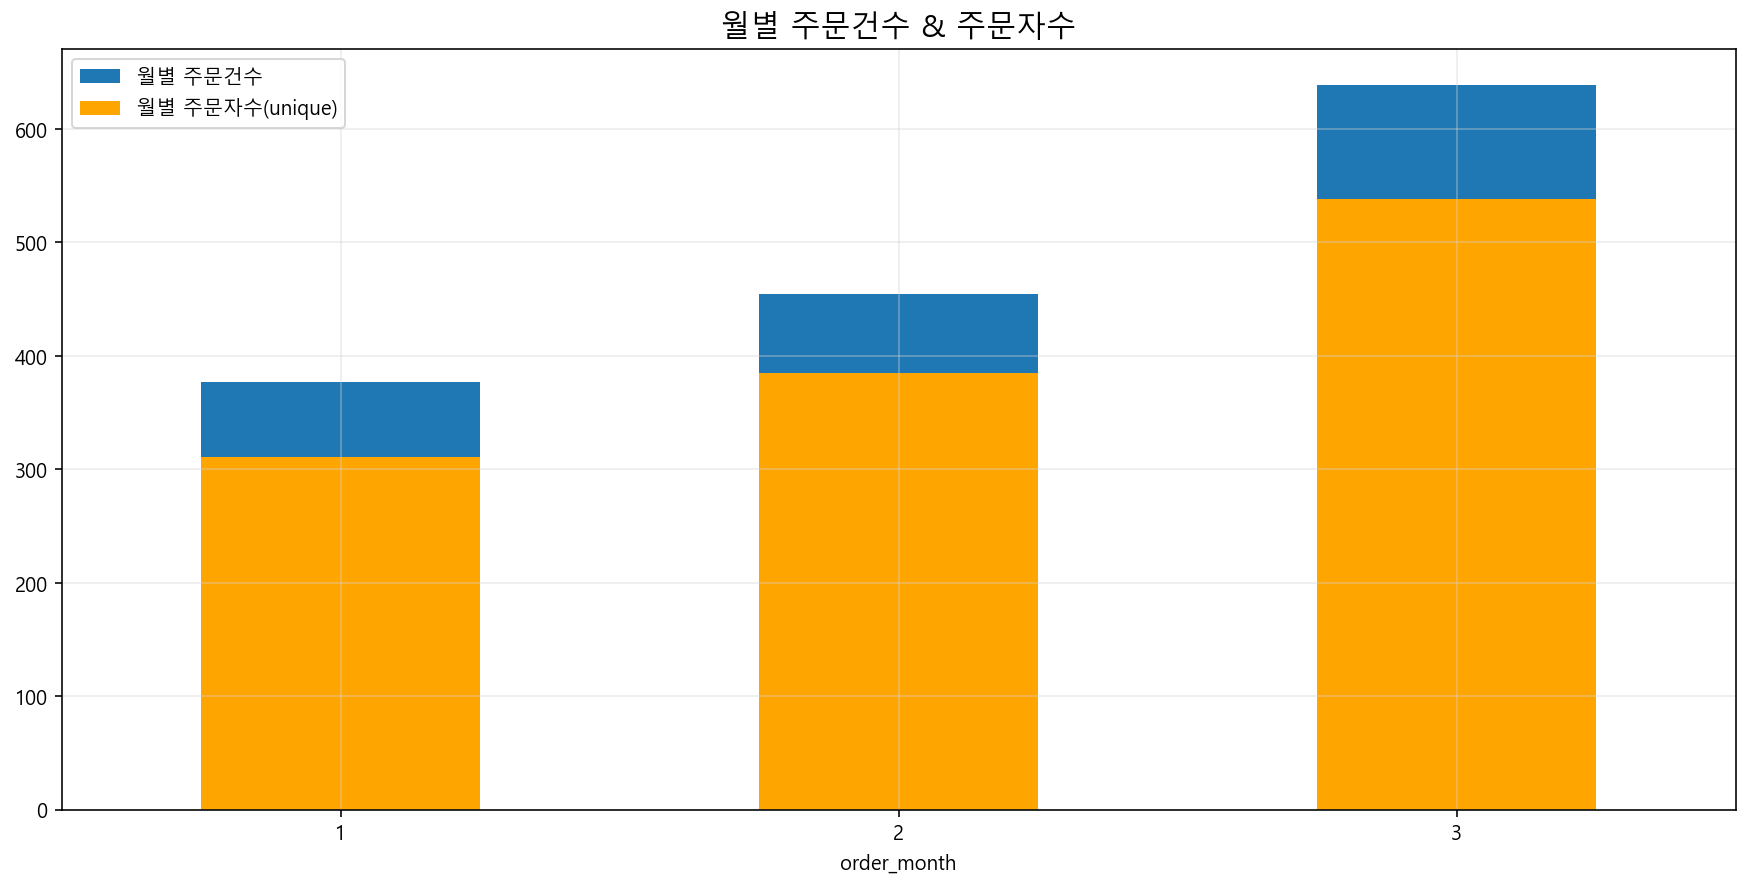

In [287]:
f, ax = plt.subplots(1, 1)
df.groupby(['order_month'])['user'].count().plot(kind='bar', figsize=(9, 6), ax=ax)
df.groupby(['order_month'])['user'].nunique().plot(kind='bar', figsize=(9, 6), color='orange', ax=ax)
f.set_size_inches(15,7) 
plt.legend(labels=['월별 주문건수', '월별 주문자수(unique)'])
plt.xticks(rotation=0)
plt.title('월별 주문건수 & 주문자수', fontsize=15)
plt.grid(color='lightgrey', alpha=0.44)

In [133]:
# df['reg_month'] = df['reg_date'].dt.month

In [288]:
# 하루에 여러 상품 주문한 유저들?
df.groupby(['order_date', 'user']).count().sort_values(by='goodsnm', ascending=False).head(10)

,,brandnm,goodsnm,reg_date,p_type,sub_type,app_yn,order_weekday,sub_type2,order_month
order_date,user,,,,,,,,,
2021-03-17,a1149461,11,11,11,11,11,11,11,11,11
2021-03-19,a1149583,10,10,10,10,10,10,10,10,10
2021-01-18,a1142677,9,9,9,9,9,9,9,9,9
2021-01-22,a1143701,7,7,7,7,7,7,7,7,7
2021-03-24,a189404,7,7,7,7,7,7,7,7,7
2021-02-05,a1129550,6,6,6,6,6,6,6,6,6
2021-03-10,a187924,6,6,6,6,6,6,6,6,6
2021-03-17,a1149542,6,6,6,6,6,6,6,6,6
2021-01-10,a1140758,5,5,5,5,5,5,5,5,5


In [157]:
df.query("order_date=='2021-03-17' & user=='a1149461'")

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,order_weekday,sub_type2,order_month
1148,Alice & Olivia,see-through lace detail blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,Wednesday,상의,3
1149,Sandro,embroidery detail lace skirt multi,a1149461,2021-03-15,2021-03-17,4days,B,N,Wednesday,하의,3
1150,Time,draping detail midi skirt gray,a1149461,2021-03-15,2021-03-17,4days,B,N,Wednesday,하의,3
1151,El estilo de Claire,ruffle detail see-through sleeve blouse black,a1149461,2021-03-15,2021-03-17,4days,T,N,Wednesday,상의,3
1152,It michaa,pocket basic pattern skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N,Wednesday,하의,3
1153,roajeu,ruffle basic pattern mermaid trumpet-skirt green,a1149461,2021-03-15,2021-03-17,4days,B,N,Wednesday,하의,3
1154,Alexander Wang,basic pattern skirt grey,a1149461,2021-03-15,2021-03-17,4days,B,N,Wednesday,하의,3
1155,Christian Dior,basic pattern sweater burgundy,a1149461,2021-03-15,2021-03-17,4days,T,N,Wednesday,상의,3
1156,MSGM,basic pattern top black,a1149461,2021-03-15,2021-03-17,4days,T,N,Wednesday,상의,3
1157,Fayewoo,ruffle lace pattern mermaid trumpet-skirt red,a1149461,2021-03-15,2021-03-17,4days,B,N,Wednesday,하의,3


In [158]:
df.query("order_date=='2021-03-19' & user=='a1149583'")

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,order_weekday,sub_type2,order_month
1102,Theory,one button jacket gray,a1149583,2021-03-16,2021-03-19,4days,O,N,Friday,아우터,3
1103,Michaa,stitch detail midi skirt white,a1149583,2021-03-16,2021-03-19,4days,B,N,Friday,하의,3
1104,Prada,daino shoulder bag skin,a1149583,2021-03-16,2021-03-19,4days,BA,N,Friday,가방,3
1105,Ted Baker,pleats basic pattern blouse pink,a1149583,2021-03-16,2021-03-19,4days,T,N,Friday,상의,3
1106,La maille sezane,frill dots pattern blouse nude,a1149583,2021-03-16,2021-03-19,4days,T,N,Friday,상의,3
1107,Michaa,basic pattern A-Line knit-dress nude,a1149583,2021-03-16,2021-03-19,4days,D,N,Friday,드레스,3
1108,Jigott,button basic pattern blouse white,a1149583,2021-03-16,2021-03-19,4days,T,N,Friday,상의,3
1109,It michaa,basic pattern H-Line dress white,a1149583,2021-03-16,2021-03-19,4days,D,N,Friday,드레스,3
1110,Mine,basic pattern skirt pink,a1149583,2021-03-16,2021-03-19,4days,B,N,Friday,하의,3
1111,Mine,punching basic pattern skirt skyblue,a1149583,2021-03-16,2021-03-19,4days,B,N,Friday,하의,3


In [160]:
df.query("order_date=='2021-01-18' & user=='a1142677'")

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,order_weekday,sub_type2,order_month
357,Vivienne Westwood,basic pattern t-shirts lavender,a1142677,2021-01-13,2021-01-18,4days,T,Y,Monday,상의,1
358,Greedilous,graphics pattern t-shirts yellow,a1142677,2021-01-13,2021-01-18,4days,T,Y,Monday,상의,1
359,System homme,pocket stripe pattern shirts pink,a1142677,2021-01-13,2021-01-18,4days,T,Y,Monday,상의,1
360,Covernat,button check pattern shirts mustard,a1142677,2021-01-13,2021-01-18,4days,T,Y,Monday,상의,1
361,Musinsa standard,button basic pattern shirts deeppink,a1142677,2021-01-13,2021-01-18,4days,T,Y,Monday,상의,1
362,Musinsa standard,button basic pattern polo-shirts beige,a1142677,2021-01-13,2021-01-18,4days,T,Y,Monday,상의,1
363,Lafudge Store,pocket basic pattern top beige,a1142677,2021-01-13,2021-01-18,4days,T,Y,Monday,상의,1
364,Calvin Klein,pocket basic pattern wool slacks grey,a1142677,2021-01-13,2021-01-18,4days,B,Y,Monday,하의,1
365,Massimo Dutti,pocket basic pattern shirts mint,a1142677,2021-01-13,2021-01-18,4days,T,Y,Monday,상의,1


### 주문 아이템 분석<br>
     ㄴ 브랜드 별 선호도, 아이템 카테고리별 선호도 분석
     ㄴ 신규 유저들의 구매 트렌드 파악

#### 브랜드별

In [508]:
'''주문건수 & 주문자수 병합'''
df_brandnm_주문건수 = df.groupby(['brandnm'])['user'].count().reset_index().rename(columns={'user':'주문건수'}).\
                                            sort_values(by='주문건수', ascending=False)

df_brandnm_주문자수 = df.groupby(['brandnm'])['user'].nunique().reset_index().rename(columns={'user':'주문자수'}).\
                                            sort_values(by='주문자수', ascending=False)

df_brandnm = df_brandnm_주문건수.merge(df_brandnm_주문자수, how='inner', on='brandnm')
df_brandnm.head(7)

,brandnm,주문건수,주문자수
0,Gucci,232,231
1,Chanel,90,89
2,Saint Laurent,86,86
3,Louis Vuitton,79,79
4,Prada,58,57
5,Burberry,53,51
6,Yves Saint Laurent,38,38


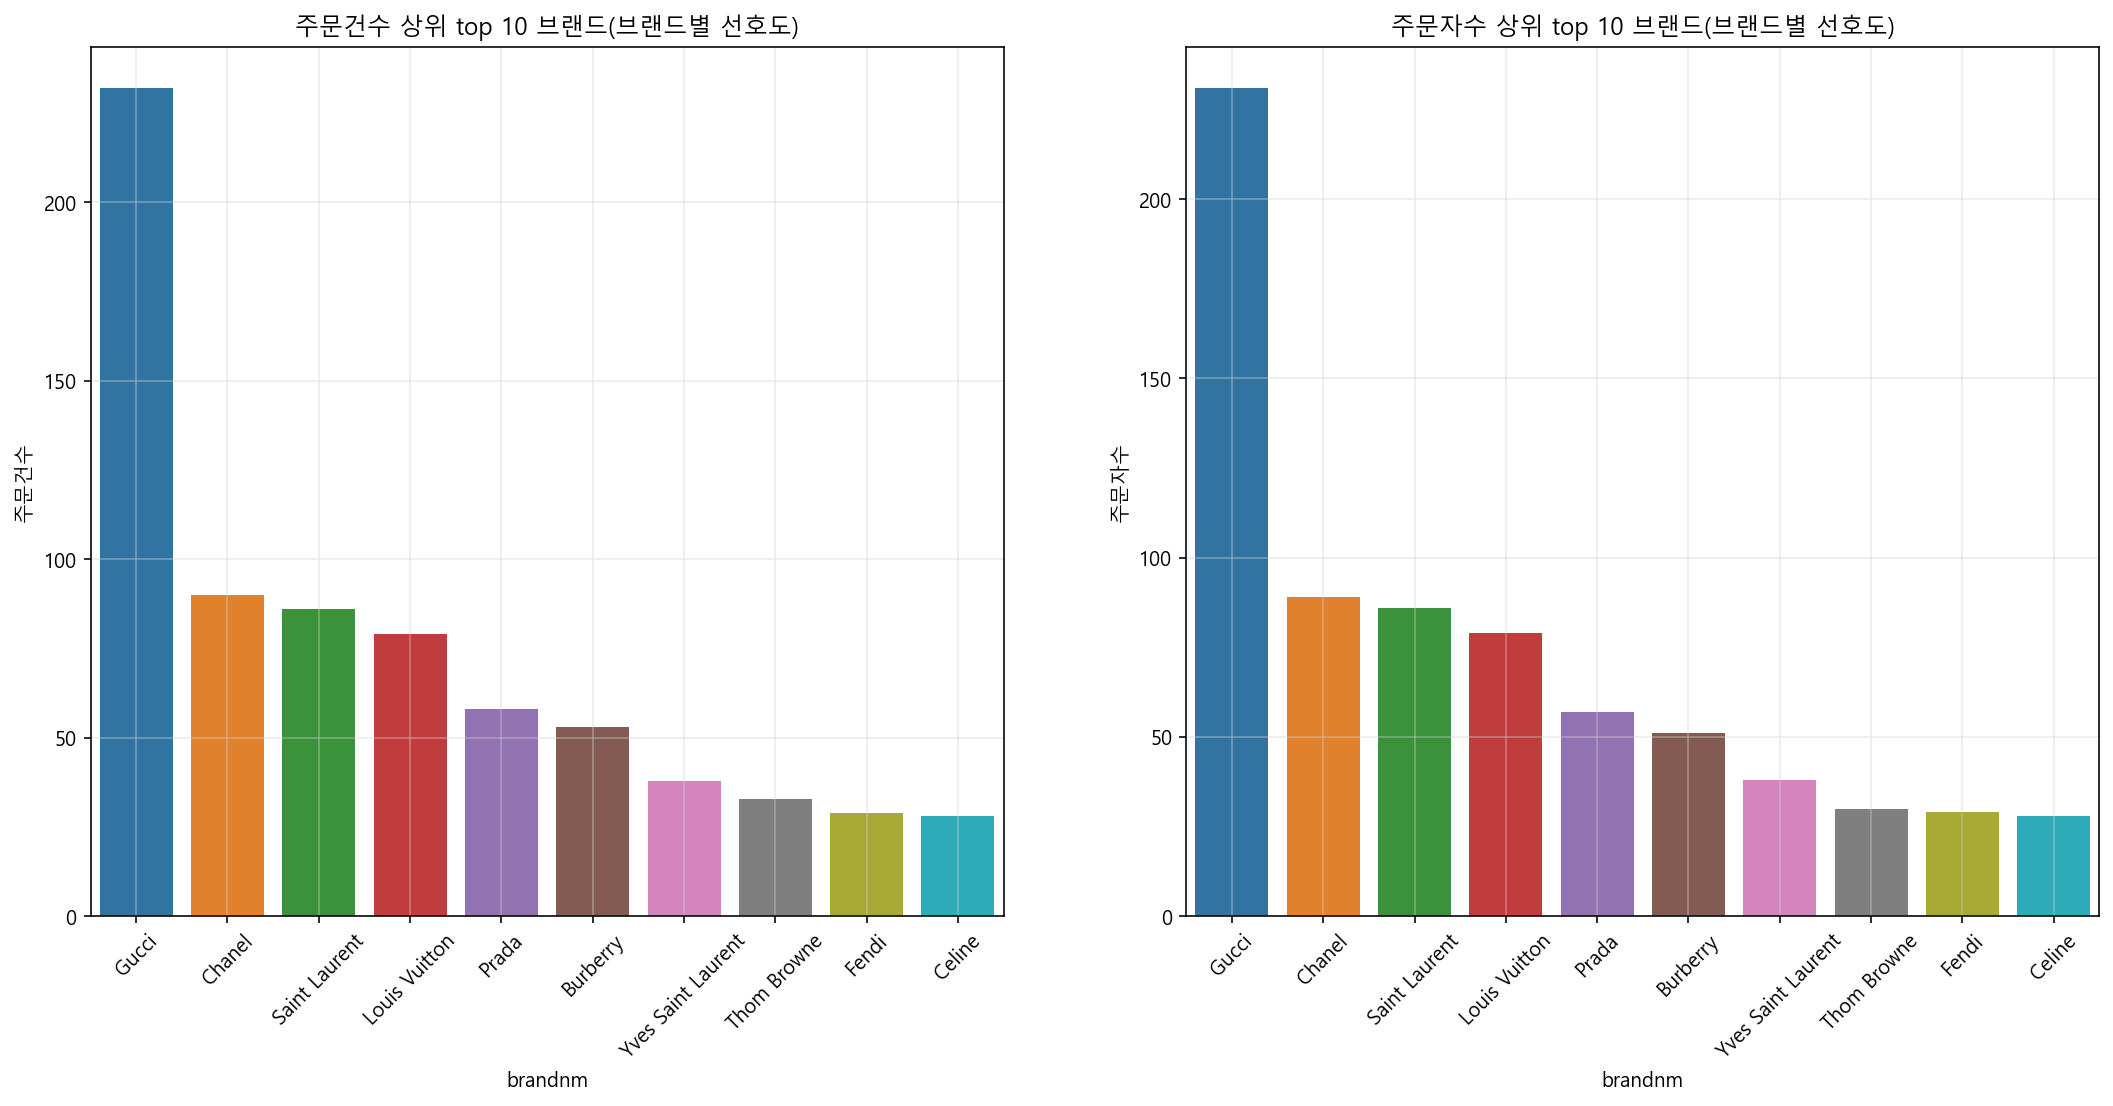

In [309]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_size_inches([18, 8])
sns.barplot(data=df_brandnm.head(10), x='brandnm', y='주문건수', ax=ax1)
sns.barplot(data=df_brandnm.head(10), x='brandnm', y='주문자수', ax=ax2)
ax1.set_xticklabels(labels=df_brandnm['brandnm'].head(10), rotation=45)
ax2.set_xticklabels(labels=df_brandnm['brandnm'].head(10), rotation=45)
ax1.set_title('주문건수 상위 top 10 브랜드(브랜드별 선호도)')
ax2.set_title('주문자수 상위 top 10 브랜드(브랜드별 선호도)')
ax1.grid(color='lightgrey', alpha=0.43)
ax2.grid(color='lightgrey', alpha=0.43)

* 주문건수, 주문자수 모두 Gucci, Chanel, Saint Laurent, Louis Vuitton, Prada, Burberry, Yves Saint Laurent, Thom Browne, Fendi, Celine 순으로 높았음

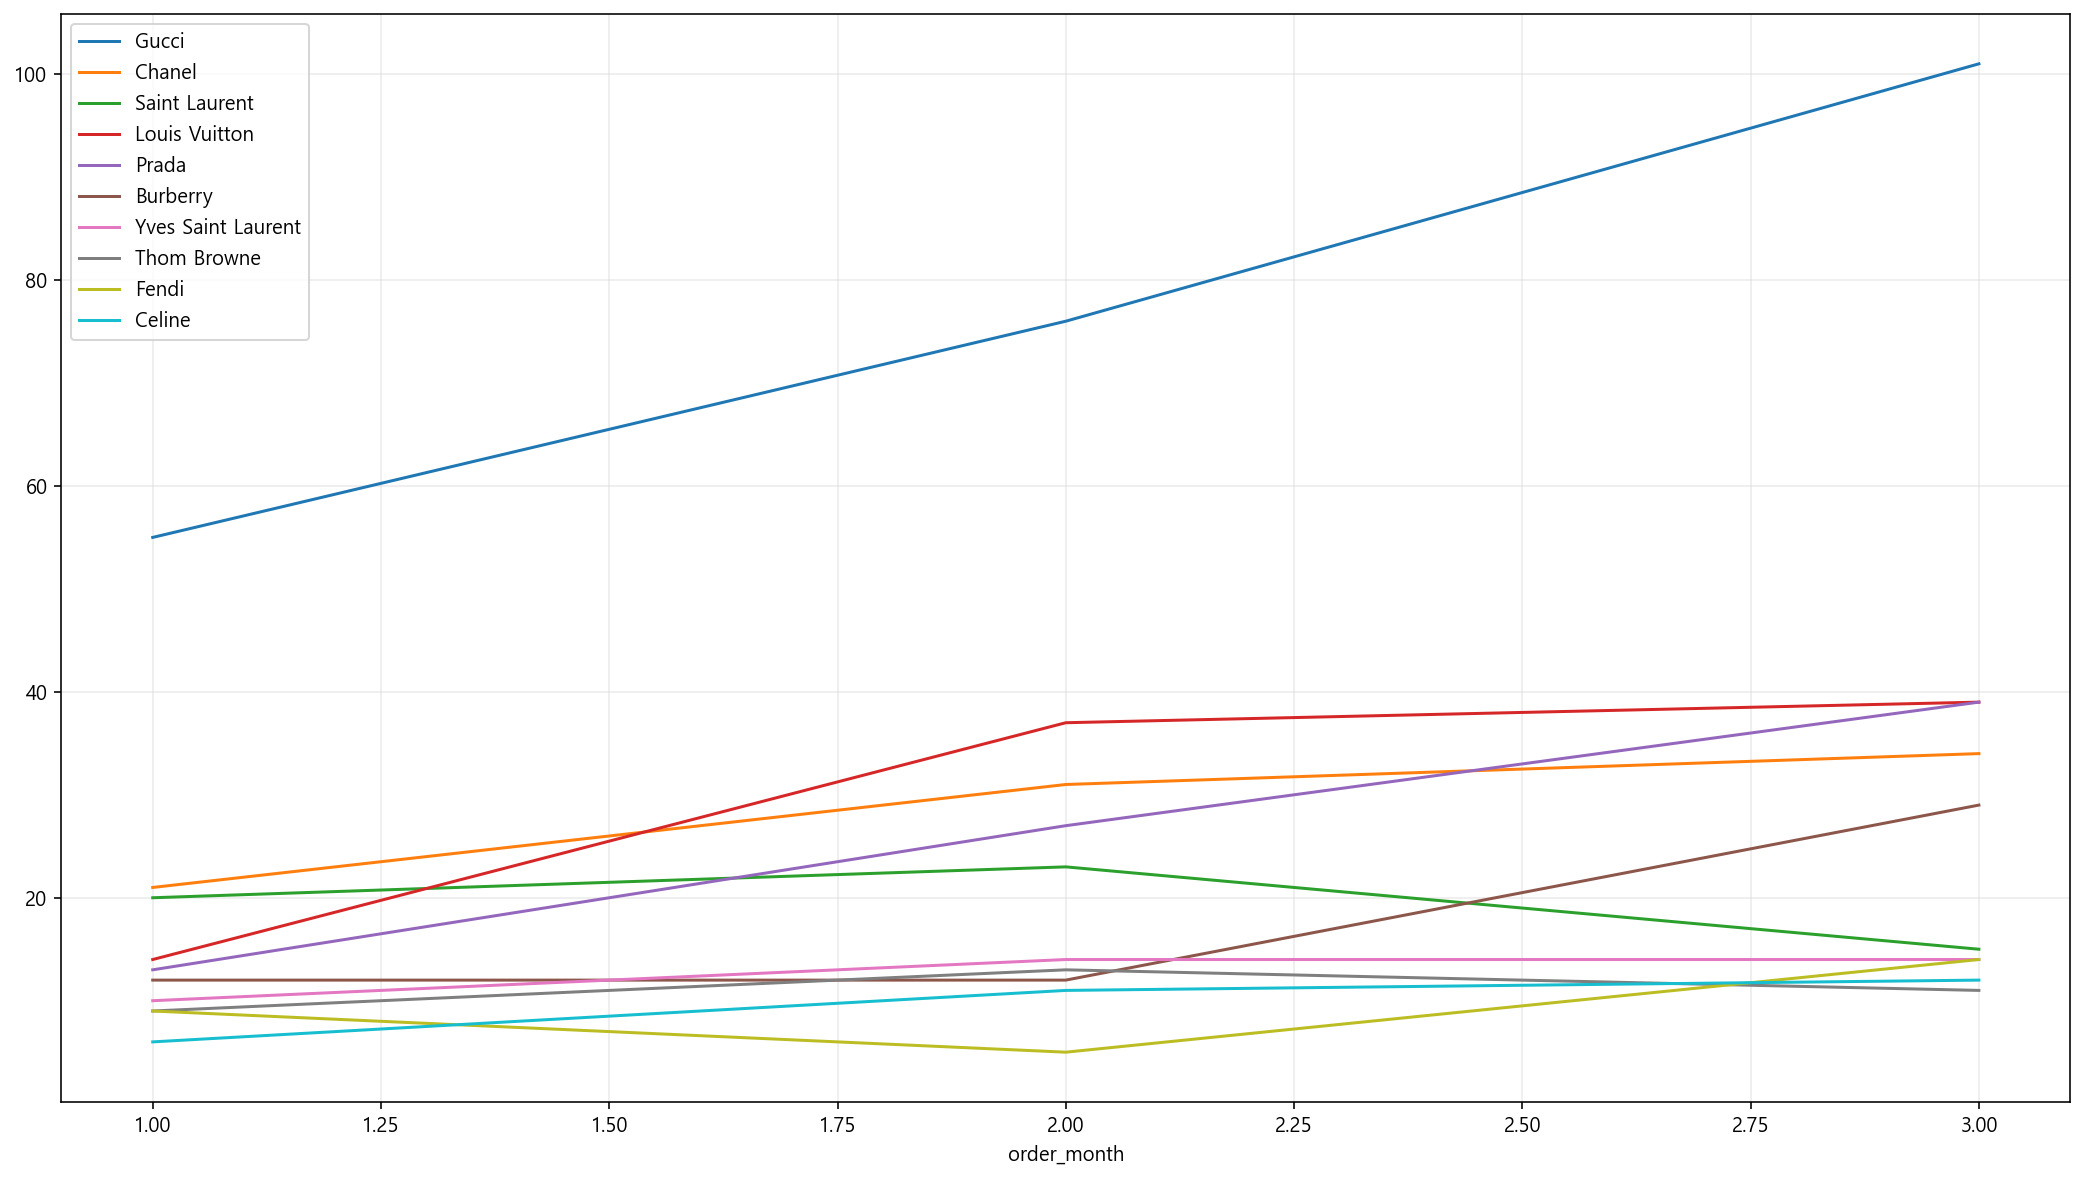

In [353]:
'''주문건수 기준, 월별 추이'''
monthly_order_count = df.pivot_table(index='brandnm',
                                   columns='order_month',
                                   values='user',
                                   aggfunc='count', fill_value=0).reset_index()
monthly_order_count = monthly_order_count.sort_values(by=[1, 2, 3], ascending=False).reset_index(drop=True)
monthly_order_count = monthly_order_count.loc[monthly_order_count['brandnm'].isin(['Gucci', 'Chanel', 'Saint Laurent', 
                                                                                   'Louis Vuitton', 'Prada', 'Burberry', 
                                                                                   'Yves Saint Laurent', 'Thom Browne', 'Fendi', 
                                                                                   'Celine'])]
monthly_order_count = monthly_order_count.T
monthly_order_count.columns=['Gucci', 'Chanel', 'Saint Laurent', 'Louis Vuitton', 'Prada', 'Burberry', 'Yves Saint Laurent', 
                               'Thom Browne', 'Fendi', 'Celine']
monthly_order_count.iloc[1:].plot(figsize=(18, 10))
plt.grid(color='lightgrey', alpha=0.43)

In [389]:
display(monthly_order_count.T.set_index('brandnm'))
display(monthly_order_count.T.set_index('brandnm').pct_change(axis=1).agg(lambda x: x*100).\
                                                    style.background_gradient('gray_r'))

order_month,1,2,3
brandnm,,,
Gucci,55,76,101
Saint Laurent,21,31,34
Prada,20,23,15
Chanel,14,37,39
Louis Vuitton,13,27,39
Burberry,12,12,29
Yves Saint Laurent,10,14,14
Thom Browne,9,13,11
Celine,9,5,14


order_month,1,2,3
brandnm,,,
Gucci,nan,38.181818,32.894737
Saint Laurent,nan,47.619048,9.677419
Prada,nan,15.000000,-34.782609
Chanel,nan,164.285714,5.405405
Louis Vuitton,nan,107.692308,44.444444
Burberry,nan,0.000000,141.666667
Yves Saint Laurent,nan,40.000000,0.000000
Thom Browne,nan,44.444444,-15.384615
Celine,nan,-44.444444,180.000000


* 증가폭은 Celine이 2월 대비 3월에 **+180%**로 가장 높았지만, 주문 건수로만 봤을 땐 9위
* Chanel은 1월 대비 2월에 **+164%**였지만, 2월 대비 3월에 **+5%**
* Burberry는 1월과 2월은 증가폭이 0이었지만, 2월 대비 3월에 **+142%**

#### 카테고리별 선호도 분석

In [390]:
# 아이템 카테고리별 선호도
df['sub_type2'].value_counts()

가방     692
아우터    267
드레스    261
상의     164
하의      58
투피스     29
Name: sub_type2, dtype: int64

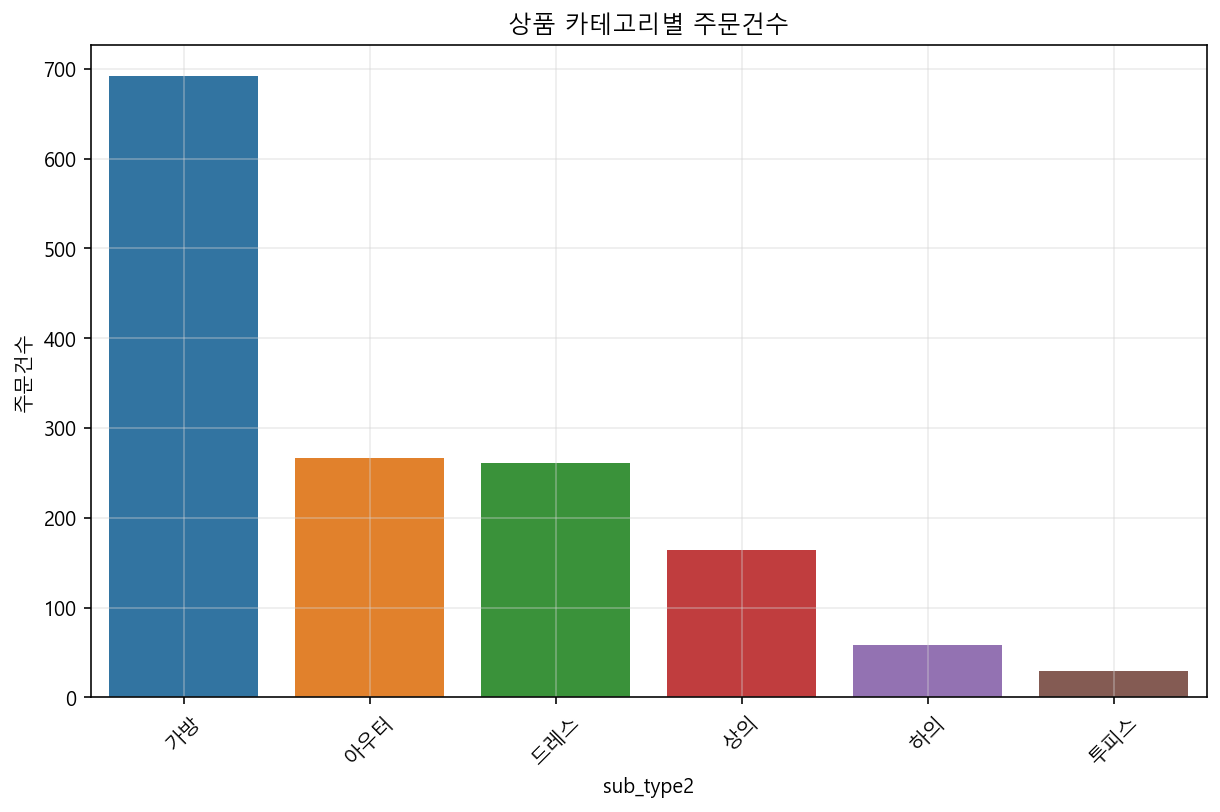

In [394]:
df_cate = df.groupby(['sub_type2'])['user'].count().reset_index().rename(columns={'user':'주문건수'}).\
                                                    sort_values(by='주문건수', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cate, x='sub_type2', y='주문건수')
plt.xticks(rotation=45)
plt.title('상품 카테고리별 주문건수')
plt.grid(color='lightgrey', alpha=0.43)

In [408]:
df['sub_type2'].value_counts().pct_change(axis=0).agg(lambda x: x*100).to_frame()

,sub_type2
가방,NaN
아우터,-61.42
드레스,-2.25
상의,-37.16
하의,-64.63
투피스,-50.00


* 제일 주문건수 많은 '가방' 카테고리는 2순위 '아우터' 카테고리보다 약 61% 주문량 많음

#### 신규 유저들의 구매 트렌드 파악

신규 유저? <br>
* 가입일: 2017.06.24~2021.03.31
* 신규유저: 2021년에 가입한 사람들로 설정
* 신규유저(new_user)와 구유저(old_user)를 구분하는 컬럼(new_or_old) 생성

In [431]:
df.head()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,order_weekday,sub_type2,order_month
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,1,Friday,가방,1
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,0,Friday,아우터,1
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,0,Friday,하의,1
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,0,Friday,상의,1
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,1,Friday,아우터,1


In [432]:
df.loc[df['reg_date'].dt.year == 2021, 'new_or_old'] = 'new_user'
df.loc[df['reg_date'].dt.year != 2021, 'new_or_old'] = 'old_user'
df.head()

,brandnm,goodsnm,user,reg_date,order_date,p_type,sub_type,app_yn,order_weekday,sub_type2,order_month,new_or_old
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,1,Friday,가방,1,old_user
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,0,Friday,아우터,1,new_user
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,0,Friday,하의,1,new_user
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,0,Friday,상의,1,new_user
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,1,Friday,아우터,1,new_user


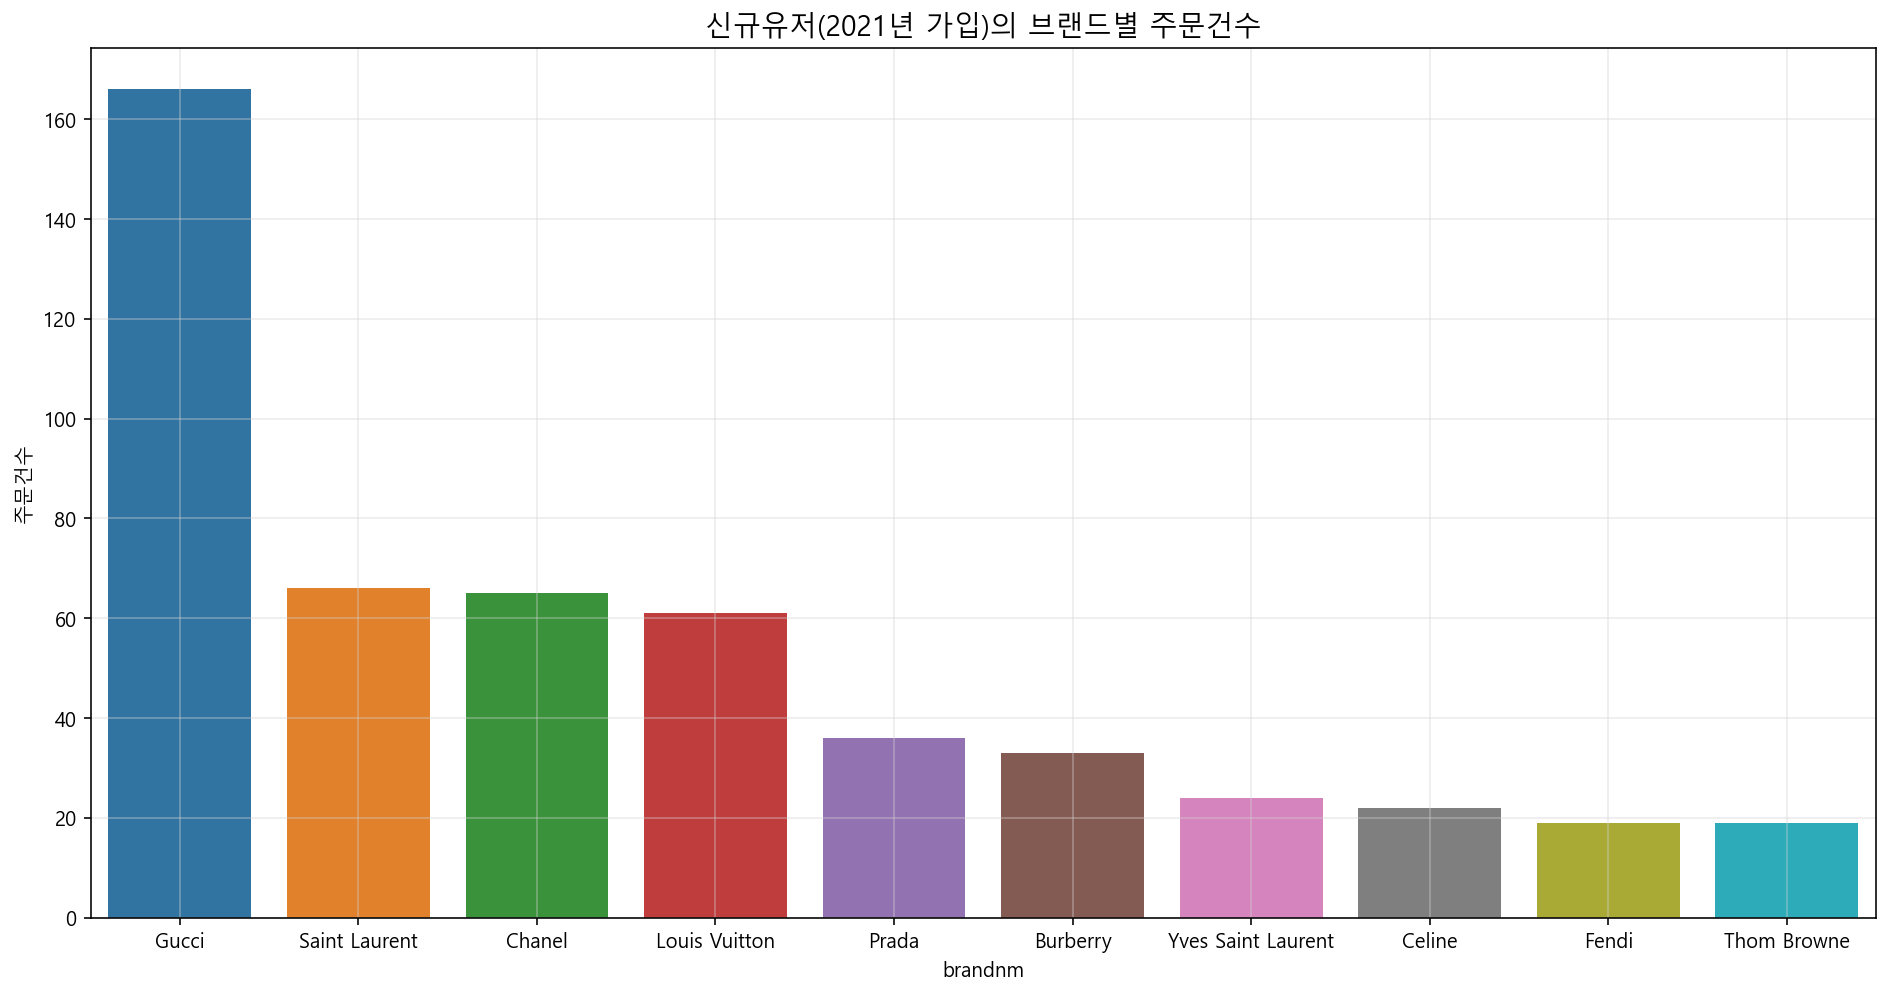

In [447]:
# new_user는 어떤 브랜드를 구매할까?
new_user_order_count = df.query("new_or_old == 'new_user'").groupby(['brandnm'])['user'].count().reset_index().\
                                                    rename(columns={'user':'주문건수'}).sort_values(by='주문건수', ascending=False)
plt.figure(figsize=(16, 8))
sns.barplot(data=new_user_order_count.head(10), x='brandnm', y='주문건수')
plt.title('신규유저(2021년 가입)의 브랜드별 주문건수', fontsize=14)
plt.grid(color='lightgrey', alpha=0.43)

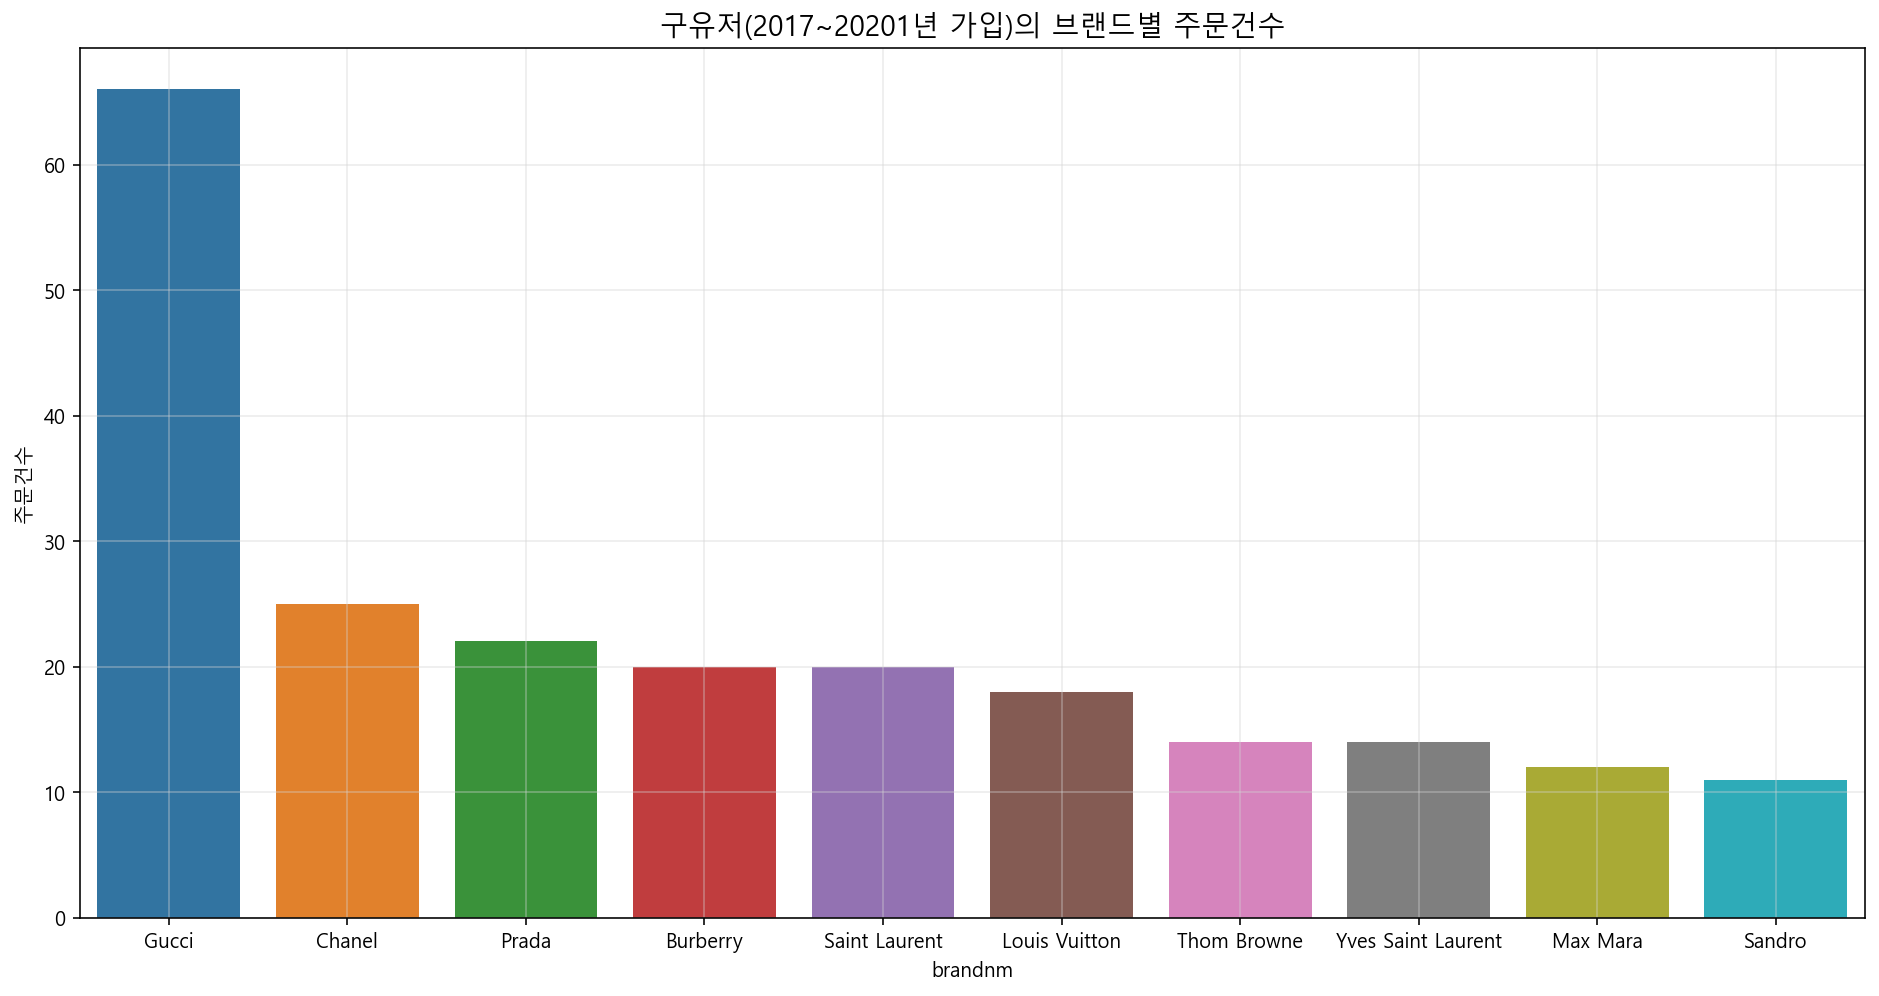

In [449]:
# old_user는 어떤 브랜드를 구매할까?
old_user_order_count = df.query("new_or_old == 'old_user'").groupby(['brandnm'])['user'].count().reset_index().\
                                                    rename(columns={'user':'주문건수'}).sort_values(by='주문건수', ascending=False)
plt.figure(figsize=(16, 8))
sns.barplot(data=old_user_order_count.head(10), x='brandnm', y='주문건수')
plt.title('구유저(2017~20201년 가입)의 브랜드별 주문건수', fontsize=14)
plt.grid(color='lightgrey', alpha=0.43)

In [506]:
# new user & old user 병합
new_old = old_user_order_count.head(15).merge(new_user_order_count.head(15), how='outer', on='brandnm')
new_old.rename(columns={'주문건수_x':'old_user_주문건수', '주문건수_y':'new_user_주문건수'}, inplace=True)
new_old.fillna(0, inplace=True)
new_old[['old_user_주문건수', 'new_user_주문건수']] = new_old[['old_user_주문건수', 'new_user_주문건수']].astype('int')

'''
old_user_주문건수가 0인 경우에는 증감률이 inf로 나옴(증감률 계산할 땐 기준년도로 나누게 되는데 0으로는 나눌 수 없으므로)
임의적으로 olu_user_주문건수 0인 경우는 1로 바꾸고 증감률 계산
'''
new_old.loc[new_old['brandnm'].isin(['Celine', 'It michaa']), 'old_user_주문건수'] = 1
new_old['주문건수 증감률'] = (new_old['new_user_주문건수'] - new_old['old_user_주문건수']) / (new_old['old_user_주문건수']) * 100
new_old.sort_values(by='주문건수 증감률', ascending=False)

,brandnm,old_user_주문건수,new_user_주문건수,주문건수 증감률
15,Celine,1,22,2100.00
16,It michaa,1,12,1100.00
5,Louis Vuitton,18,61,238.89
4,Saint Laurent,20,66,230.00
1,Chanel,25,65,160.00
0,Gucci,66,166,151.52
10,Fendi,10,19,90.00
11,Christian Dior,8,14,75.00
7,Yves Saint Laurent,14,24,71.43
3,Burberry,20,33,65.00


* 2017~2020년 가입자에 비해 2021년 가입자는 Vivienne Westwood, Lucky Chouette를 1건도 구매하지 않음
* 2017~2020년 가입자는 Celine, It michaa를 1건도 구매하지 않았는데 2021년 가입자는 Celine 22건, It michaa 12건 구매했음
* 구유저 대비 신규유저의 주문건수 증감률이 높은 순으로는 Celine, It michaa, Louis Vuitton, Saint Laurent, Chanel, Gucci 순